# Artificial Intelligence
## L2 International, Univ. Bordeaux

### Unsupervised Learning

In unsupervised machine learning algorithms, we do not have any supervisor to provide any guidance. We do not have correct answers and algorithms need to discover the interesting pattern in data for learning. One of the most used approaches in this domain is clustering. It aims to divide the set of observations into subsets, called clusters, in such a way that observations in the same cluster are similar and they are dissimilar to the observations in other clusters.

Last week we wokred with K-Means and used the miniBatch version of the K-Means algorithm. This week we will see some more unsupervised clustering algorithms.

## PART 1. Density-based Spatial Clustering of Applications with Noise (DBSCAN)

**Principle**: Given a set of points in some space, it groups together points that are closely packed together

**Outliers** : the points which are « far » from others, isolated, will be considered as noise

Q1. Import necessary `python` modules to use `numpy` and `DBSCAN`

In [8]:
import numpy as np
from sklearn.cluster import DBSCAN

Q2. Create a dataset X, a 6 × 2 numpy matrix with the following rows : (1,2), (2,2), (7,6), (8,7), (2,3)and (25,8), and plot the data.

Hint: Instantiate the DBSCAN model. The parameters will be epsilon equal to 3 and the minimum number of points required to form a cluster is 2

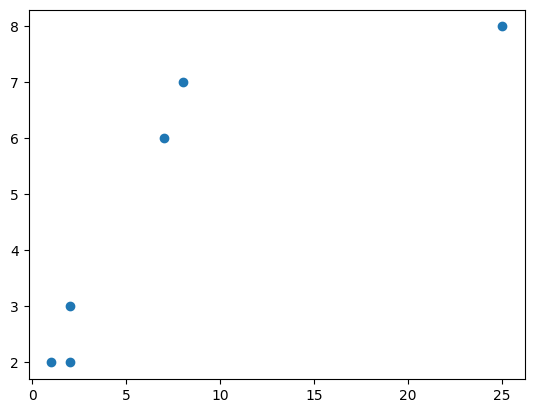

In [9]:
import matplotlib.pyplot as plt
db = DBSCAN(eps=3, min_samples=2)
dataset=np.array([[1,2],[2,2],[7,6],[8,7],[2,3],[25,8]])
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()


Q3. Train the DBSCAN model with X as input data. Print the predicted labels for each data point and draw the clusters.

In [10]:
db.fit(dataset)

DBSCAN(eps=3, min_samples=2)

Q4. Execute the given code and describe what you see. Read the comments in the code and try to follow them to understand functions of sklearn better.

ANSWER:

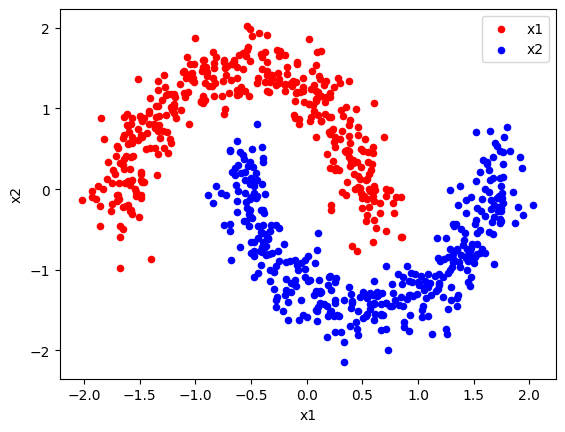

In [11]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=750, shuffle=True, noise=0.11,
random_state=42)  # Try to see what this function does
X = StandardScaler().fit_transform(X)  # Check what the standard scaler is and why it is useful
# Split and organize the data
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
grouped = df.groupby('label')
# And plot it
colors = ["red", "blue"]
labels = ["x1", "x2"]
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2',
    label=labels[key], color=colors[key])
pyplot.show()

We can see that the code created two half moons using sklearn functions.

Q5. Try to use the K-Means algorithm from last lab to run it on this data. Plot the clusters for this result and comment on what you see.


ANSWER:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


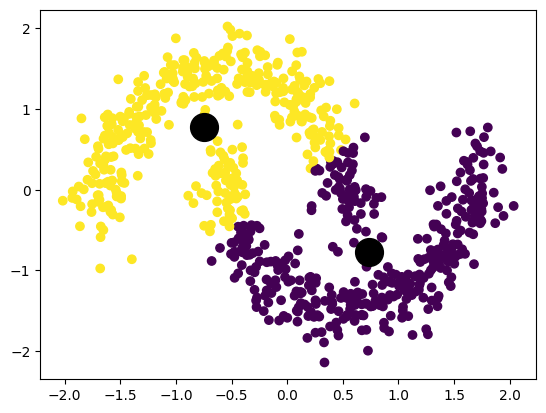

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
ymeans=kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = ymeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black',s=400);
plt.show()

We can observe that the Kmeans algorithm did not manage to identify the two half moons.

Q6. Now try to use the DBSCAN model on this data. Try different values for epsilon and min_samples. Plot the cluster outputs for your trials and comment on what you observe.

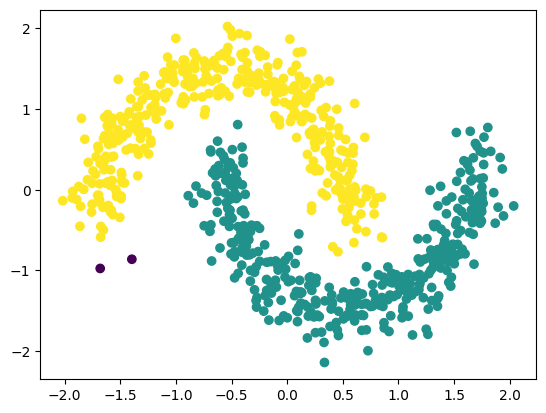

In [13]:
db = DBSCAN(eps=0.3, min_samples=2)
db.fit(X)
labels = db.labels_
ypred=db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],c=ypred)
plt.show()

ANSWER:

hint: Compare the output you see with DBSCAN and K-Means. And how changing the epsilon and min_samples affects the output with DBSCAN

We can observe that the DBSCAN algorithm created two different clusters, that are divided correctly into 2 half moons.

**Bonus Exercise**: Execute the following code and do the DBSCAN and K-Means on the data like you did for the last question and comment on what you see

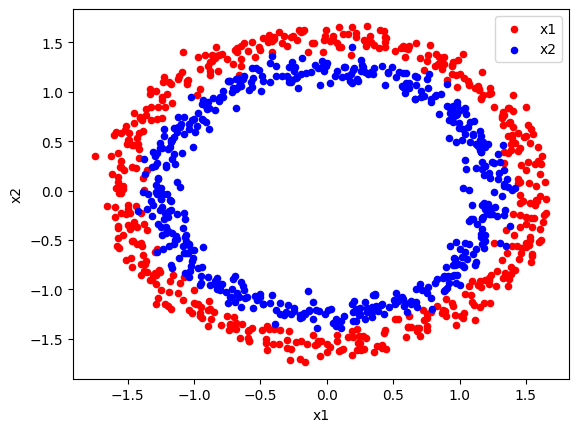

In [114]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05,random_state=42)  # Try to see what this function does
X = StandardScaler().fit_transform(X)
# Split and organize the data
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
grouped = df.groupby('label')
# And plot it
colors = ["red", "blue"]
labels = ["x1", "x2"]
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2',
    label=labels[key], color=colors[key])
pyplot.show()


### Thus what can you say the main benefit of using DBSCAN?

ANSWER:

## PART 2. Hierarchical Clustering

### 2.1 Dendograms

A dendogram is diagram with a tree structure. It is used to divide into multiple clusters depending upon the problem.

Q1. Execute the following code:

In [15]:
import numpy as np
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30], [85,70],[71,80],[60,78],[70,55],[80,91],])

Q2. Plot these points using the function given below

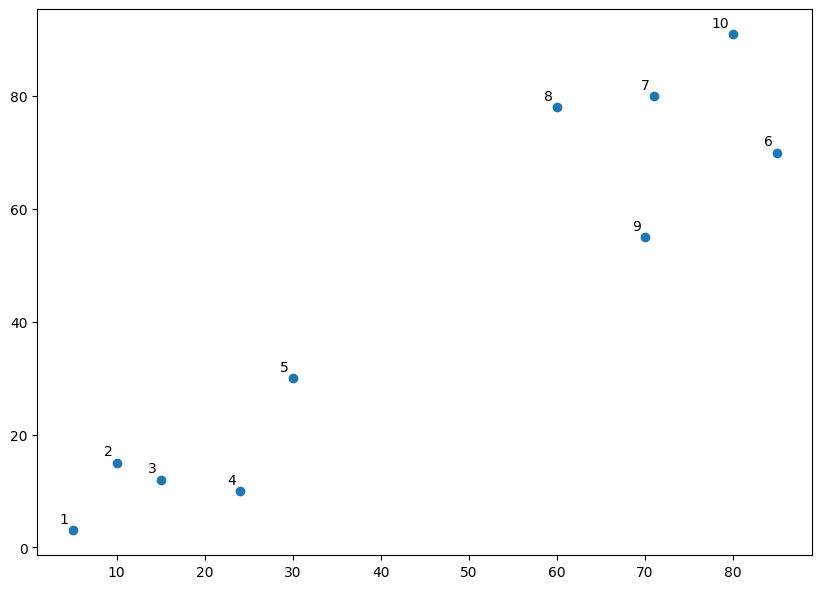

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),
    textcoords='offset points', ha='right', va='bottom')
plt.show()

Q3. Use the following code to see how the dendogram can be used to visualize the data we just created

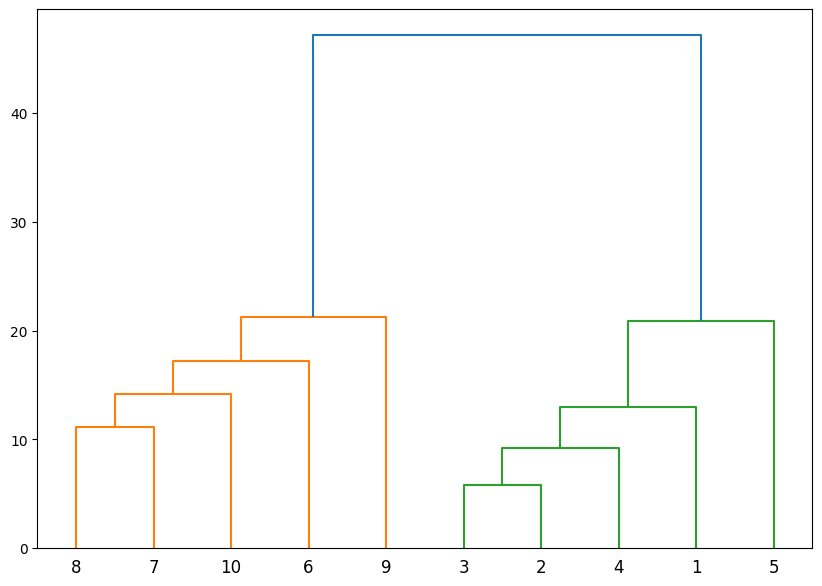

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()

Q4. Copy the above given code to a new cell and insert the following lines in the correct place to get the dendogram

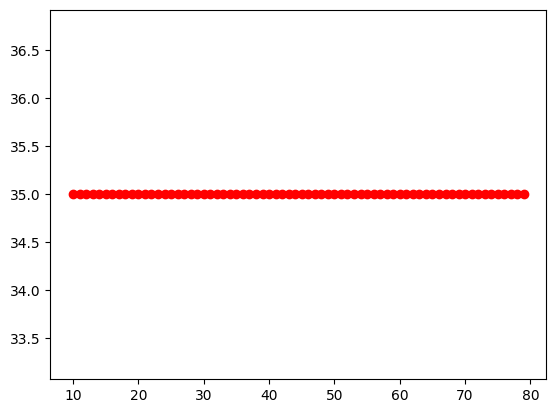

In [18]:
hline = np.array([[x,35] for x in range(10,80)])
plt.scatter(hline[:,0], hline[:,1], color='red')

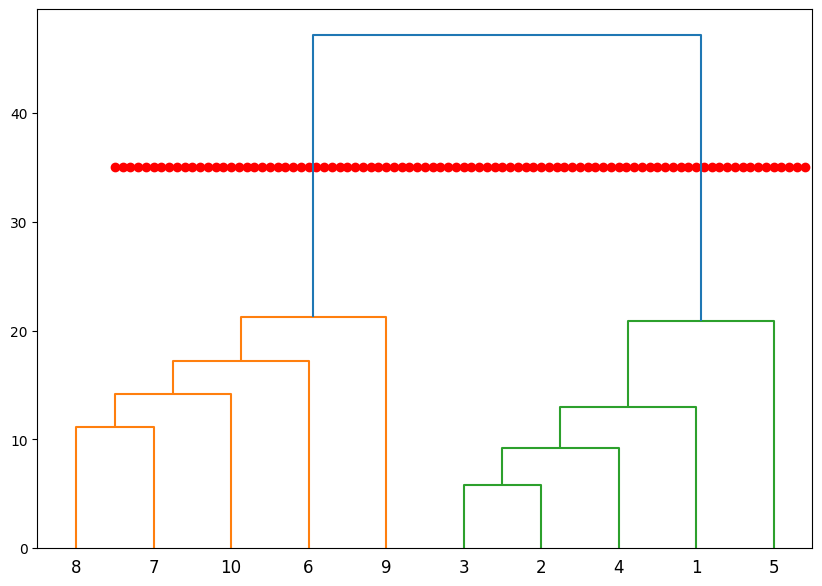

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
hline = np.array([[x,35] for x in range(10,100)])
plt.scatter(hline[:,0], hline[:,1], color='red')
plt.show()

Q5. Modify your code to get the line as shown in this figure

![image.png](attachment:image.png)

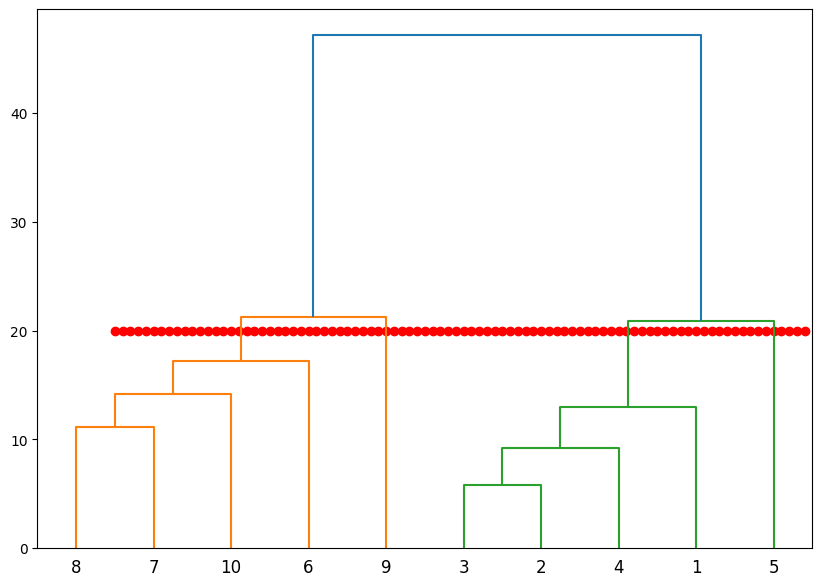

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
hline = np.array([[x,20] for x in range(10,100)])
plt.scatter(hline[:,0], hline[:,1], color='red')
plt.show()

Q6. What is you idea about the dendogram and how do you think it might be useful?

ANSWER: A dendogram shows the relationship of the points in our dataset and their hierarchy. We can use this to group the points into clusters based on the distance between them.

### 2.2. Aglomerative Clustering


Q1. What do you understand about the term agglomerative clustering?

ASNWER: Agglomerative clustering firstly considers each point as its own cluster. Next, it starts grouping step by step the clusters that are closer together to form a bigger cluster. In the end, each point will be in only one cluster.


Q2. Use the `AgglomerativeClustering` class from `sklearn.cluster` to see what it does. You can execute the code given below to get the clusters

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,
metric='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 3, 2, 0, 0, 2, 0])

Q3. Once you have the clusters write the code to plot these clusters and print the labels.

[1 1 1 1 3 2 0 0 2 0]


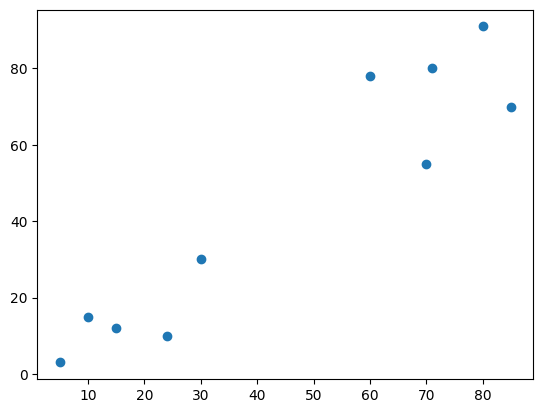

In [22]:
plt.scatter(X[:,0],X[:,1])
print(cluster.labels_)


### 2.3 Hierarchical Clustering on Real Data

So far we used our dummy data to understand the clustering and how to visualize them. In this example, we will do the hierarchical clustering on a real-world data to actually see its application. The problem is to segment customers into different groups based on thier shopping trends. The dataset for this question is provided with the Lab folder you downloaded and is called `shopping-data.csv`.


Q1. Similar to your first lab load this data with `pandas` and visualize the contents.

Hint: Check for missing values, get the `info` of the dataframe and comment on the characteristics of this data. Unlike Titanic dataset you saw last time there will not be any label column like survived. Check what the different columns in the file are and try to guess which columns might be useful for the clustering and which will not be useful

In [23]:
import pandas as pd
customers_trends= pd.read_csv('shopping-data.csv')
print(customers_trends)
customers_trends.info()


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

After running the code, we can observe that there are no missing values as we have 200 rows and each column has 200 non-null values. The columns that we will probably use for the clustering process will probably be the anual income, spending score and age. We could also anticipate that gender could have an impact on our data, as women are believed to spend more than men on groceries. However, CustomerID will have no importance in the clustering process.

Q2. Execute the following code. Tell what it does and what you see in the variable `data`

In [24]:
data = customers_trends[['Annual Income (k$)','Spending Score (1-100)']] # here you can replace custom_data with the name of the variable you used to read the data from the csv

The code selects the two columns from our data set and in the variable data we will have 'Annual Income (k$)' and 'Spending Score (1-100)'.

Q3. Execute the following code to obtain the dendogram of this dataset.

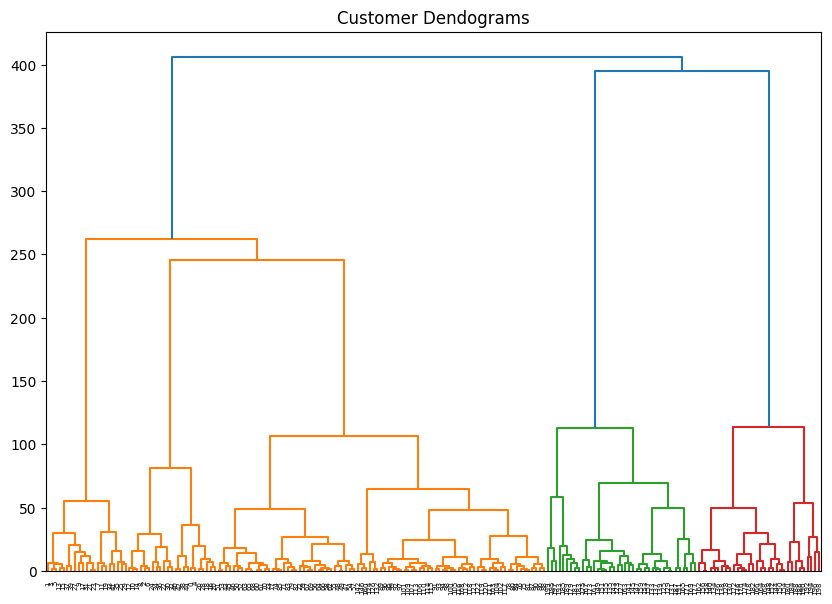

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Q4. Add instructions to draw a horizontal line that passes through longest distance (vertical lines) that does not pass through any of the horizontal lines in the dendogram. How many clusters do you expect ? (Using this plot you can decide how many clusters to make)

Hint: In the dendogram fid the space with the longest vertical lines

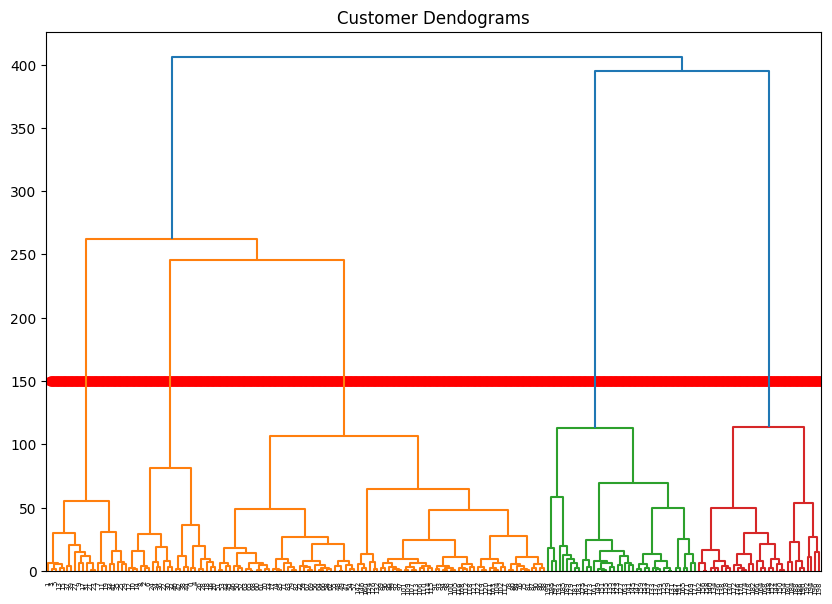

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
hline = np.array([[x,150] for x in range(10,2200)])
plt.scatter(hline[:,0], hline[:,1], color='red')

Looking at the dendogram we can expect 5 clusters because the line cuts the vertical lines in 5 points.

Q5. Use aglomeration clustering to create the clusters and plot them.

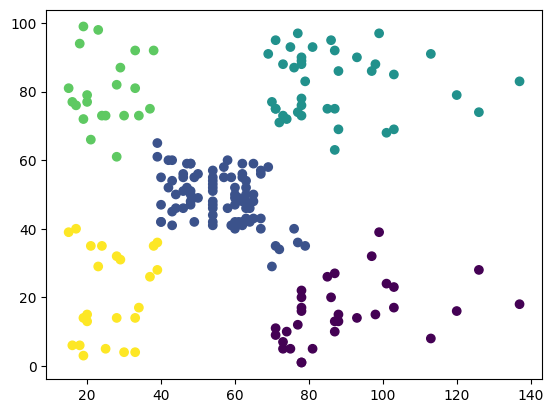

In [41]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric ='euclidean', linkage='ward')
cluster.fit_predict(data)
plt.scatter(data[:,0], data[:,1],c=cluster.labels_, cmap='viridis')


Q6. Give an interpretation of the result.


ANSWER: We can observe we have 5 different colored areas corresponding to our 5 clusters. At the top of the y axis we have the people who spend the most shopping and at the very right of the x axis we have the people with the highest annual salaries. We can also see that most people are in the blue cluster of medium income and medium spending.